# **Ad Click Prediction Using R**

Pada kesempatan kali ini saya membuat Klasifikasi Ad Click Prediction dan bagaimana cara menggunakan kNN dengan package caret di R. Caret merupakan package R yang keren banget, karena sampai saat ini sudah ada 150 algoritma machine learning yang langsung bisa kamu pakai. Caret juga sudah menyediakan function sampai contoh-contoh data (training maupun testing), preprocessing, evaluasi model, dan lain-lain.

**Load tidyverse package**

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



mengimport dataset Social_Network_Ads.csv. Kemudian menampilkan 6 data teratas dan terbawah dari dataset tersebut

In [2]:
data.src = read.csv('../input/cvdcvd-vd/Social_Network_Ads.csv')
head(data.src)
tail(data.src)

,User.ID,Gender,Age,EstimatedSalary,Purchased
,<int>,<chr>,<int>,<int>,<int>
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0
6,15728773,Male,27,58000,0


,User.ID,Gender,Age,EstimatedSalary,Purchased
,<int>,<chr>,<int>,<int>,<int>
395,15757632,Female,39,59000,0
396,15691863,Female,46,41000,1
397,15706071,Male,51,23000,1
398,15654296,Female,50,20000,1
399,15755018,Male,36,33000,0
400,15594041,Female,49,36000,1


summary() menghasilkan beberapa nilai statistik deskriptif untuk masing-masing variabel jika yang dimasukan sebagai argumen adalah data frame. Untuk variabel numerik maka akan menhasilkan nilai minimum (Min.), quantil pertama (1st Qu.), median (Median), rata-rata (Mean), quantil ketiga (3rd Qu.), maksimum (Max.) dan banyaknya missing value (NA's) jika ada. Untuk variabel kategorik (character atau factor) makan akan menghasilkan banyaknya data (Length), kelas (Class) dan mode (Mode).

In [3]:
summary (data.src)

    User.ID            Gender               Age        EstimatedSalary 
 Min.   :15566689   Length:400         Min.   :18.00   Min.   : 15000  
 1st Qu.:15626764   Class :character   1st Qu.:29.75   1st Qu.: 43000  
 Median :15694342   Mode  :character   Median :37.00   Median : 70000  
 Mean   :15691540                      Mean   :37.66   Mean   : 69742  
 3rd Qu.:15750363                      3rd Qu.:46.00   3rd Qu.: 88000  
 Max.   :15815236                      Max.   :60.00   Max.   :150000  
   Purchased     
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.3575  
 3rd Qu.:1.0000  
 Max.   :1.0000  

melihat struktur data dari dataset

In [4]:
str(data.src)

'data.frame':	400 obs. of  5 variables:
 $ User.ID        : int  15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829 15600575 15727311 ...
 $ Gender         : chr  "Male" "Male" "Female" "Female" ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


# **DATA VISUALIZATION**

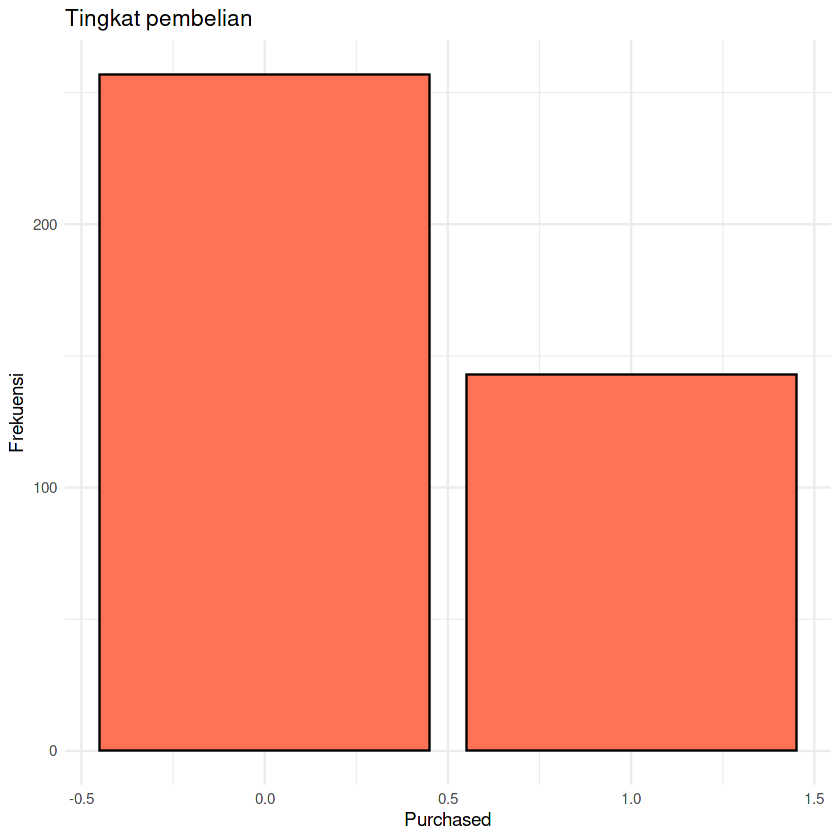

In [5]:
library(ggplot2)                                                                       
                                                 
ggplot(data.src, aes(x = Purchased)) +                                                  
  geom_bar(fill = "coral1",color= "black") +                                            
  theme_minimal() +                                                                    
  labs(x = "Purchased",                                             
       y = "Frekuensi",   
       title = "Tingkat pembelian")

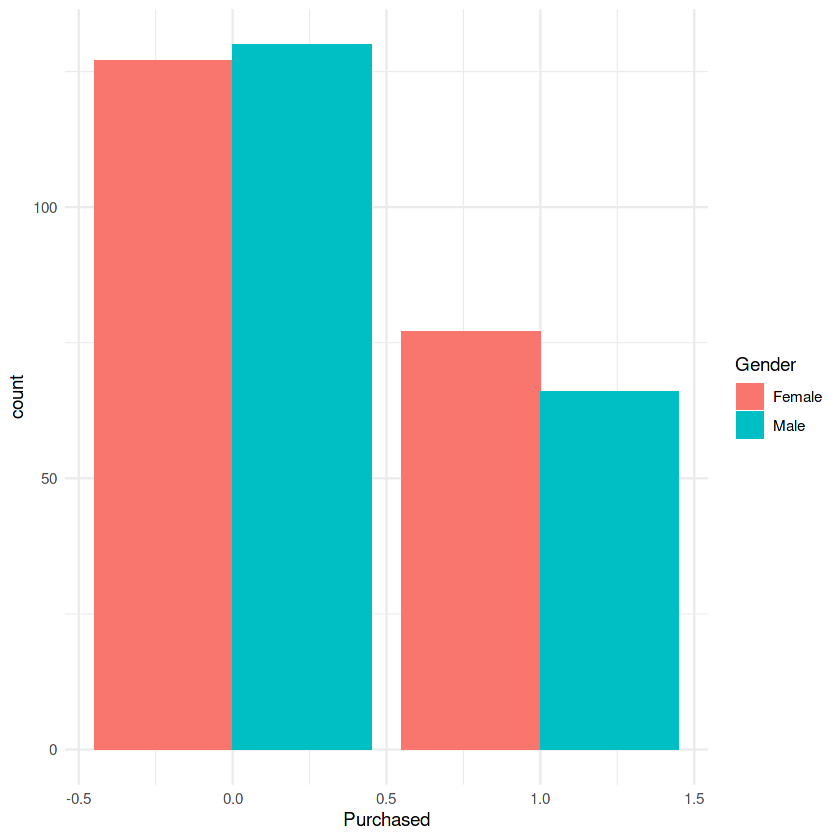

In [6]:
ggplot(data.src, aes(x = Purchased, fill = Gender)) +
  theme_minimal() +                               
  geom_bar(position = position_dodge(preserve = "single"))

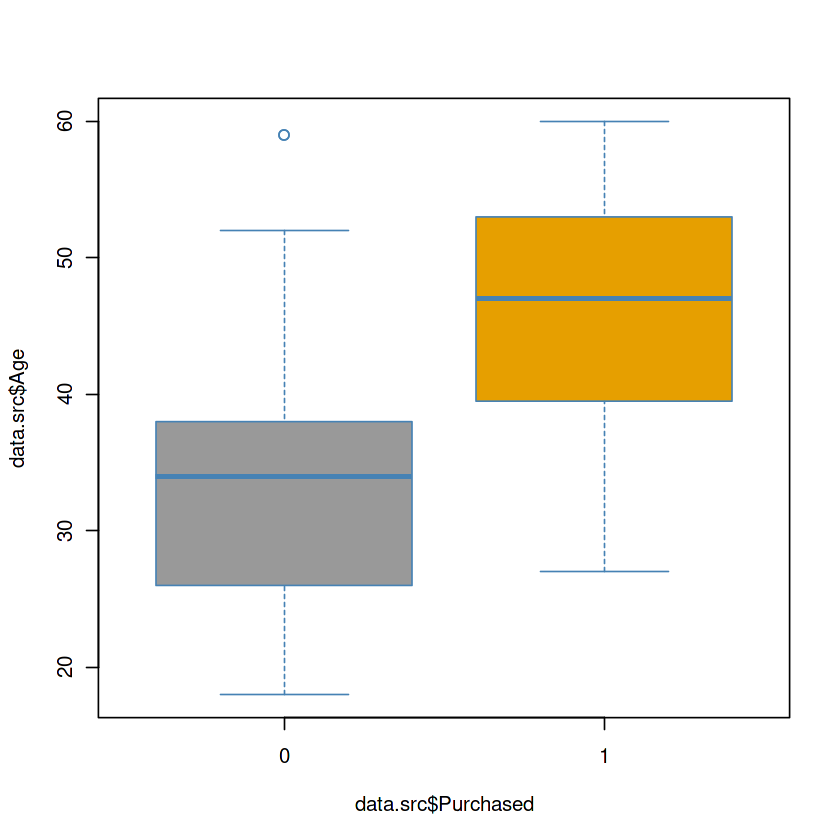

In [7]:
boxplot(data.src$Age~data.src$Purchased,
        # ubah warna outline menjadi steelblue
        border = "steelblue",
        # ubah warna box berdasarkan grup
        col= c("#999999", "#E69F00", "#56B4E9"))

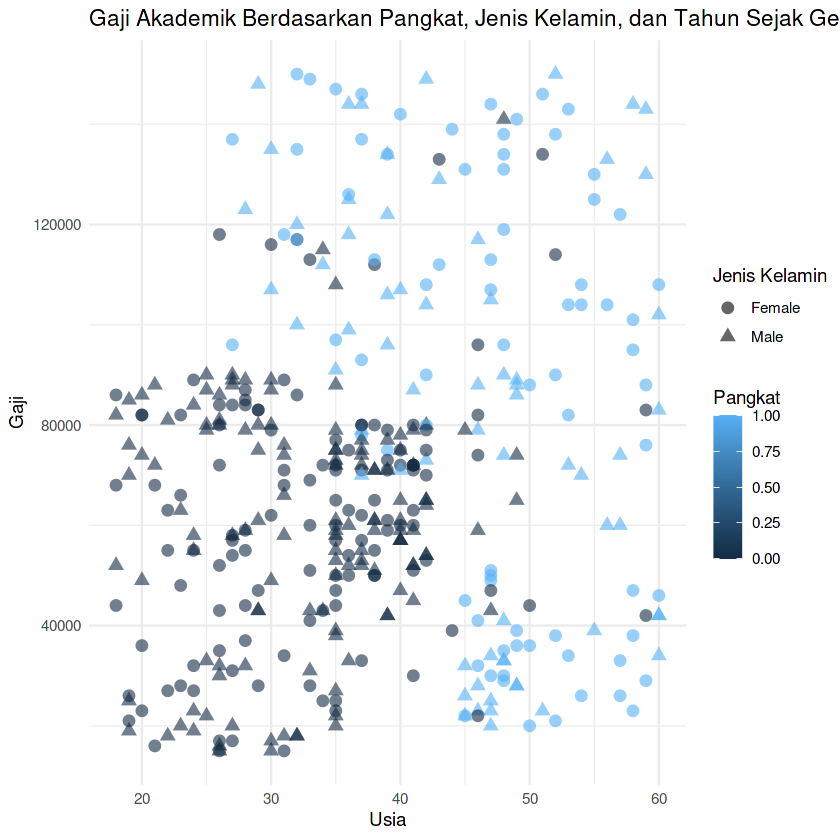

In [8]:
ggplot(data.src, 
       aes(x = Age, 
           y = EstimatedSalary, 
           color = Purchased, 
           shape = Gender)) +
  geom_point(size = 3, alpha = .6) +
  theme_minimal() +
  labs(title = "Gaji Akademik Berdasarkan Pangkat, Jenis Kelamin, dan Tahun Sejak Gelar",
       x = "Usia",
       y = "Gaji",
       color = "Pangkat",
       shape = "Jenis Kelamin")

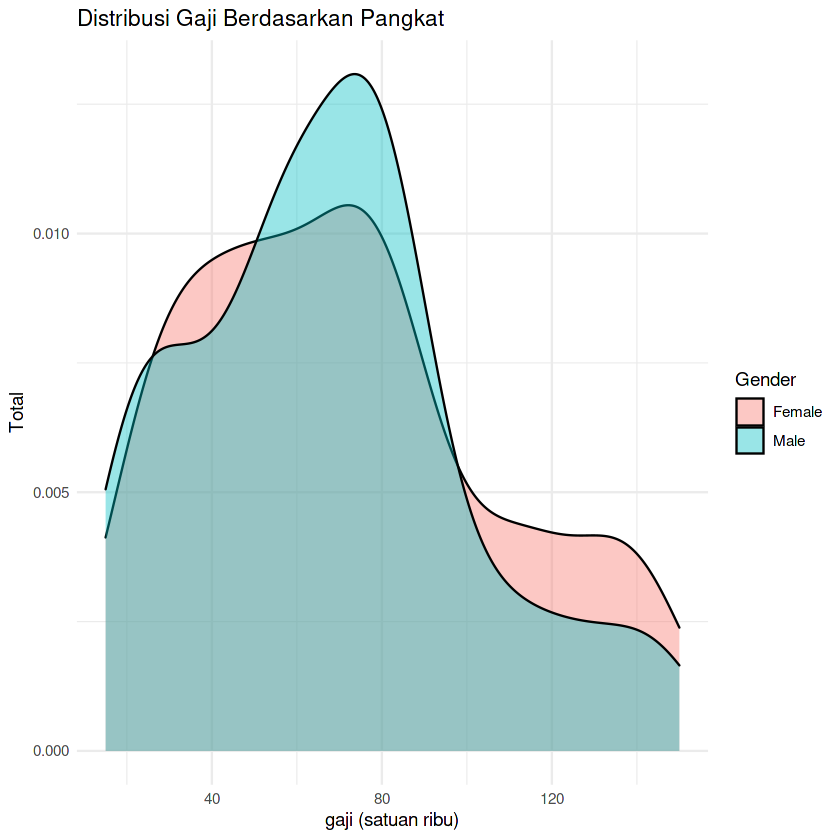

In [9]:
ggplot(data.src, 
       aes(x = EstimatedSalary/1e3, 
           fill = Gender)) +
  geom_density(alpha = 0.4) +
  theme_minimal() +
  labs(title = "Distribusi Gaji Berdasarkan Pangkat",
       x = "gaji (satuan ribu)",
       y = "Total")

# **Load caret package**

In [10]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




# **Splitting Dataset to training and testing**

In [11]:
set.seed(300)
#Spliting data as training and test set. Using createDataPartition() function from caret. p is the percentage of data that goes to training. 
indxTrain <- createDataPartition(y = data.src$Purchased,p = 0.75,list = FALSE)
training <- data.src[indxTrain,]
testing <- data.src[-indxTrain,]

#Checking distibution in original data and partitioned data
prop.table(table(training$Purchased)) * 100
prop.table(table(testing$Purchased)) * 100
prop.table(table(data.src$Purchased)) * 100


       0        1 
65.66667 34.33333 


 0  1 
60 40 


    0     1 
64.25 35.75 

# **PreProcessing**

KNN membutuhkan variabel untuk dinormalisasi atau diskalakan. caret menyediakan fasilitas untuk preprocess data. Saya akan memilih pemusatan dan penskalaan

In [12]:
trainX <- training[,names(training) != "Purchased"]
preProcValues <- preProcess(x = trainX,method = c("center", "scale"))
preProcValues

Created from 300 samples and 4 variables

Pre-processing:
  - centered (3)
  - ignored (1)
  - scaled (3)


# **Training and Train Control**

In [13]:
set.seed(400)
ctrl <- trainControl(method="repeatedcv",repeats = 3) #,classProbs=TRUE,summaryFunction = twoClassSummary)
knnFit <- train(Purchased ~ ., data = training, method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)
#Output of kNN fit
knnFit

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


k-Nearest Neighbors 

300 samples
  4 predictor

Pre-processing: centered (4), scaled (4) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 270, 270, 270, 270, 270, 270, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   5  0.2736481  0.6631768  0.1437778
   7  0.2739560  0.6677445  0.1546032
   9  0.2776706  0.6714113  0.1645556
  11  0.2865293  0.6599234  0.1780724
  13  0.2932790  0.6510173  0.1894444
  15  0.3020623  0.6364560  0.2011019
  17  0.3095020  0.6230676  0.2114887
  19  0.3135614  0.6202248  0.2196404
  21  0.3213995  0.6051764  0.2292063
  23  0.3263732  0.5970998  0.2358937
  25  0.3287936  0.5973423  0.2396291
  27  0.3353017  0.5822770  0.2476323
  29  0.3375412  0.5829718  0.2519119
  31  0.3403386  0.5821285  0.2563766
  33  0.3438459  0.5768677  0.2614478
  35  0.3466323  0.5731869  0.2658095
  37  0.3492877  0.5704859  0.2695883
  39  0.3523475  0.5654456  0.2738746
  41  0.3548315  0.56355

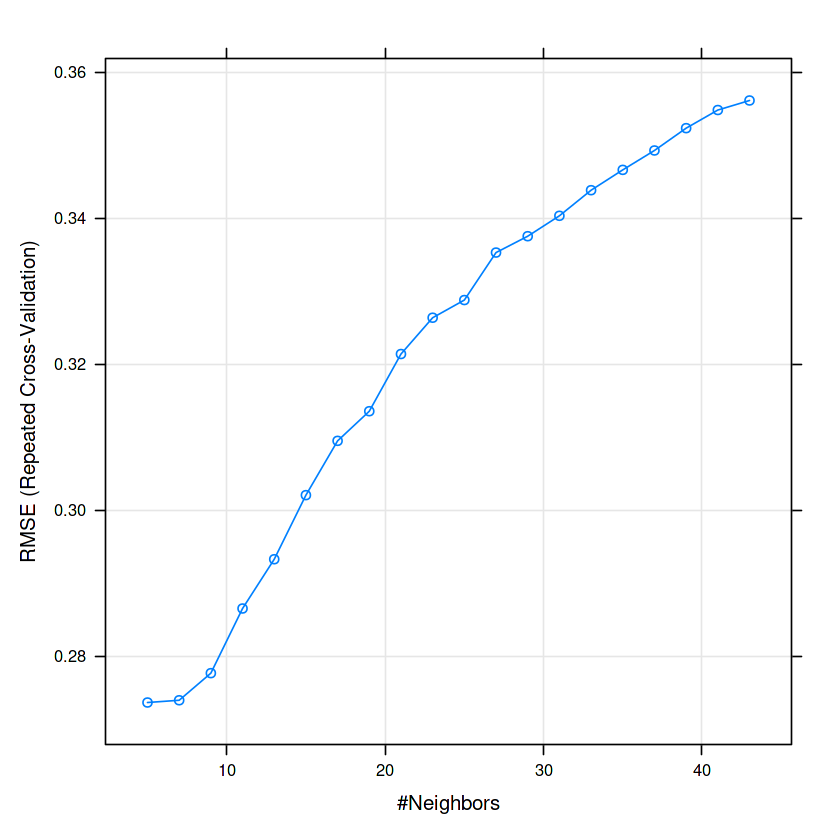

In [14]:
#Plotting yields Number of Neighbours Vs accuracy (based on repeated cross validation)
plot(knnFit)

In [15]:
knnPredict <- predict(knnFit,newdata = testing )
#Get the confusion matrix to see accuracy value and other parameter values
confusionMatrix(
  factor(knnPredict, levels = 1:2),
  factor(testing$Purchased, levels = 1:2)
)

Confusion Matrix and Statistics

          Reference
Prediction  1  2
         1 11  0
         2  0  0
                                     
               Accuracy : 1          
                 95% CI : (0.7151, 1)
    No Information Rate : 1          
    P-Value [Acc > NIR] : 1          
                                     
                  Kappa : NaN        
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity :  1         
            Specificity : NA         
         Pos Pred Value : NA         
         Neg Pred Value : NA         
             Prevalence :  1         
         Detection Rate :  1         
   Detection Prevalence :  1         
      Balanced Accuracy : NA         
                                     
       'Positive' Class : 1          
                                     

Berdasarkan hasil evaluasi yang sudah dilakukan, bisa disimpulkan bahwa model yang dibuat sudah sangat baik dalam memprediksi user yang akan mengklik iklan atau tidak. Hal tersebut dapat dilihat dari nilai accuracy = 1. Dimana dataset memiliki jumlah label yang seimbang (balance class), sehingga evaluasi performansi dapat menggunakan metrik Accuracy